In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
k= pd.read_csv("data.csv", encoding= 'latin-1')
df = pd.DataFrame(k)
print( df.shape)
num_duplicates = df.duplicated().sum()
print(num_duplicates)
duplicate_num=df.duplicated(subset=['Name','Age','Value','Jersey Number']).sum()
print(duplicate_num)

(16650, 89)
0
0


In [4]:
df = df.drop('Photo' , axis=1)
df = df.drop('Flag' , axis=1)
df = df.drop( 'Club Logo', axis=1)
df = df.drop( 'Real Face', axis=1)

In [5]:
unique_values = df['Body Type'].unique()
print(unique_values)
body_types = ['Lean', 'Normal','Stocky']
df.loc[~df['Body Type'].isin(body_types), 'Body Type'] = np.nan
print(df['Body Type'])

['Messi' 'C. Ronaldo' 'Neymar' 'Lean' 'Normal' 'Courtois' 'Stocky'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Akinfenwa' nan]
0           NaN
1           NaN
2           NaN
3          Lean
4        Normal
          ...  
16645      Lean
16646    Normal
16647    Normal
16648      Lean
16649    Stocky
Name: Body Type, Length: 16650, dtype: object


In [6]:
missing_values = df.isnull().sum()
print(missing_values)
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)


ï»¿                  0
ID                   0
Name                 0
Age                  0
Nationality          0
                  ... 
GKHandling          49
GKKicking           49
GKPositioning       49
GKReflexes          49
Release Clause    1506
Length: 85, dtype: int64
Club                         229
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
                            ... 
GKHandling                    49
GKKicking                     49
GKPositioning                 49
GKReflexes                    49
Release Clause              1506
Length: 75, dtype: int64


In [7]:
missing_values = df.isnull().sum()
print(missing_values)
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

ï»¿                  0
ID                   0
Name                 0
Age                  0
Nationality          0
                  ... 
GKHandling          49
GKKicking           49
GKPositioning       49
GKReflexes          49
Release Clause    1506
Length: 85, dtype: int64
Club                         229
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
                            ... 
GKHandling                    49
GKKicking                     49
GKPositioning                 49
GKReflexes                    49
Release Clause              1506
Length: 75, dtype: int64


In [8]:
df = df.dropna(subset=['LS','ST','RS'])

In [9]:
missing_values = df.isnull().sum()
print(missing_values)
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

ï»¿                  0
ID                   0
Name                 0
Age                  0
Nationality          0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1334
Length: 85, dtype: int64
Club                      191
Body Type                   6
Joined                   1327
Loaned From             13756
Contract Valid Until      191
Release Clause           1334
dtype: int64


In [10]:
df = df.drop('Loaned From' , axis=1)

In [11]:
mode = df['Body Type'].mode()[0]
df['Body Type'].fillna(mode, inplace=True)
df['Club'].fillna('Unknown', inplace=True)


In [12]:
df['Release Clause'] = df['Release Clause'].str.replace('[^\d.]', '', regex=True).astype(float)
df = df.rename(columns={'Release Clause': 'Release Clause(in € M)'})

df['Value'] = df['Value'].str.replace('[^\d.]', '', regex=True).astype(float)
df = df.rename(columns={'Value': 'Value(in € M)'})

df['Wage'] = df['Wage'].str.replace('[^\d.]', '', regex=True).astype(float)
df = df.rename(columns={'Wage': 'Wage(in € K)'})

df['Feet'], df['Inches'] = df['Height'].str.split("'", 1).str
df['Feet'] = df['Feet'].astype(int)
df['Inches'] = df['Inches'].str.extract('(\d+)').astype(int)
df['Height(in cm)'] = (df['Feet'] * 30.48) + (df['Inches'] * 2.54)
df.drop(['Feet', 'Inches', 'Height'], axis=1, inplace=True)

df['Weight( in kg)'] = df['Weight'].str.extract('(\d+)').astype(float) * 0.453592
df.drop(['Weight'], axis=1, inplace=True)

<ipython-input-12-20551f451f5a>:10: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Feet'], df['Inches'] = df['Height'].str.split("'", 1).str
<ipython-input-12-20551f451f5a>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Feet'], df['Inches'] = df['Height'].str.split("'", 1).str


In [13]:
average = df['Release Clause(in € M)'].mean()
df['Release Clause(in € M)'].fillna(average, inplace=True)

In [14]:
df = df.drop( 'Joined', axis=1)
df = df.drop( 'Contract Valid Until', axis=1)

In [15]:
df['BMI'] = df['Weight( in kg)'] / ((df['Height(in cm)']/100) ** 2)
df['AverageRating'] = df[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl']].mean(axis=1)
df['PhyscalRating'] = df[['Acceleration', 'SprintSpeed','Agility','Reactions','Balance','Stamina','Strength']].mean(axis=1)
df['TacticalRating'] = df[['Aggression','Interceptions','Positioning','Vision']].mean(axis=1)
df['Defence_Rating'] = df[['Marking', 'StandingTackle', 'SlidingTackle' ]].mean(axis=1)
df['GKRating'] = df[['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes' ]].mean(axis=1)



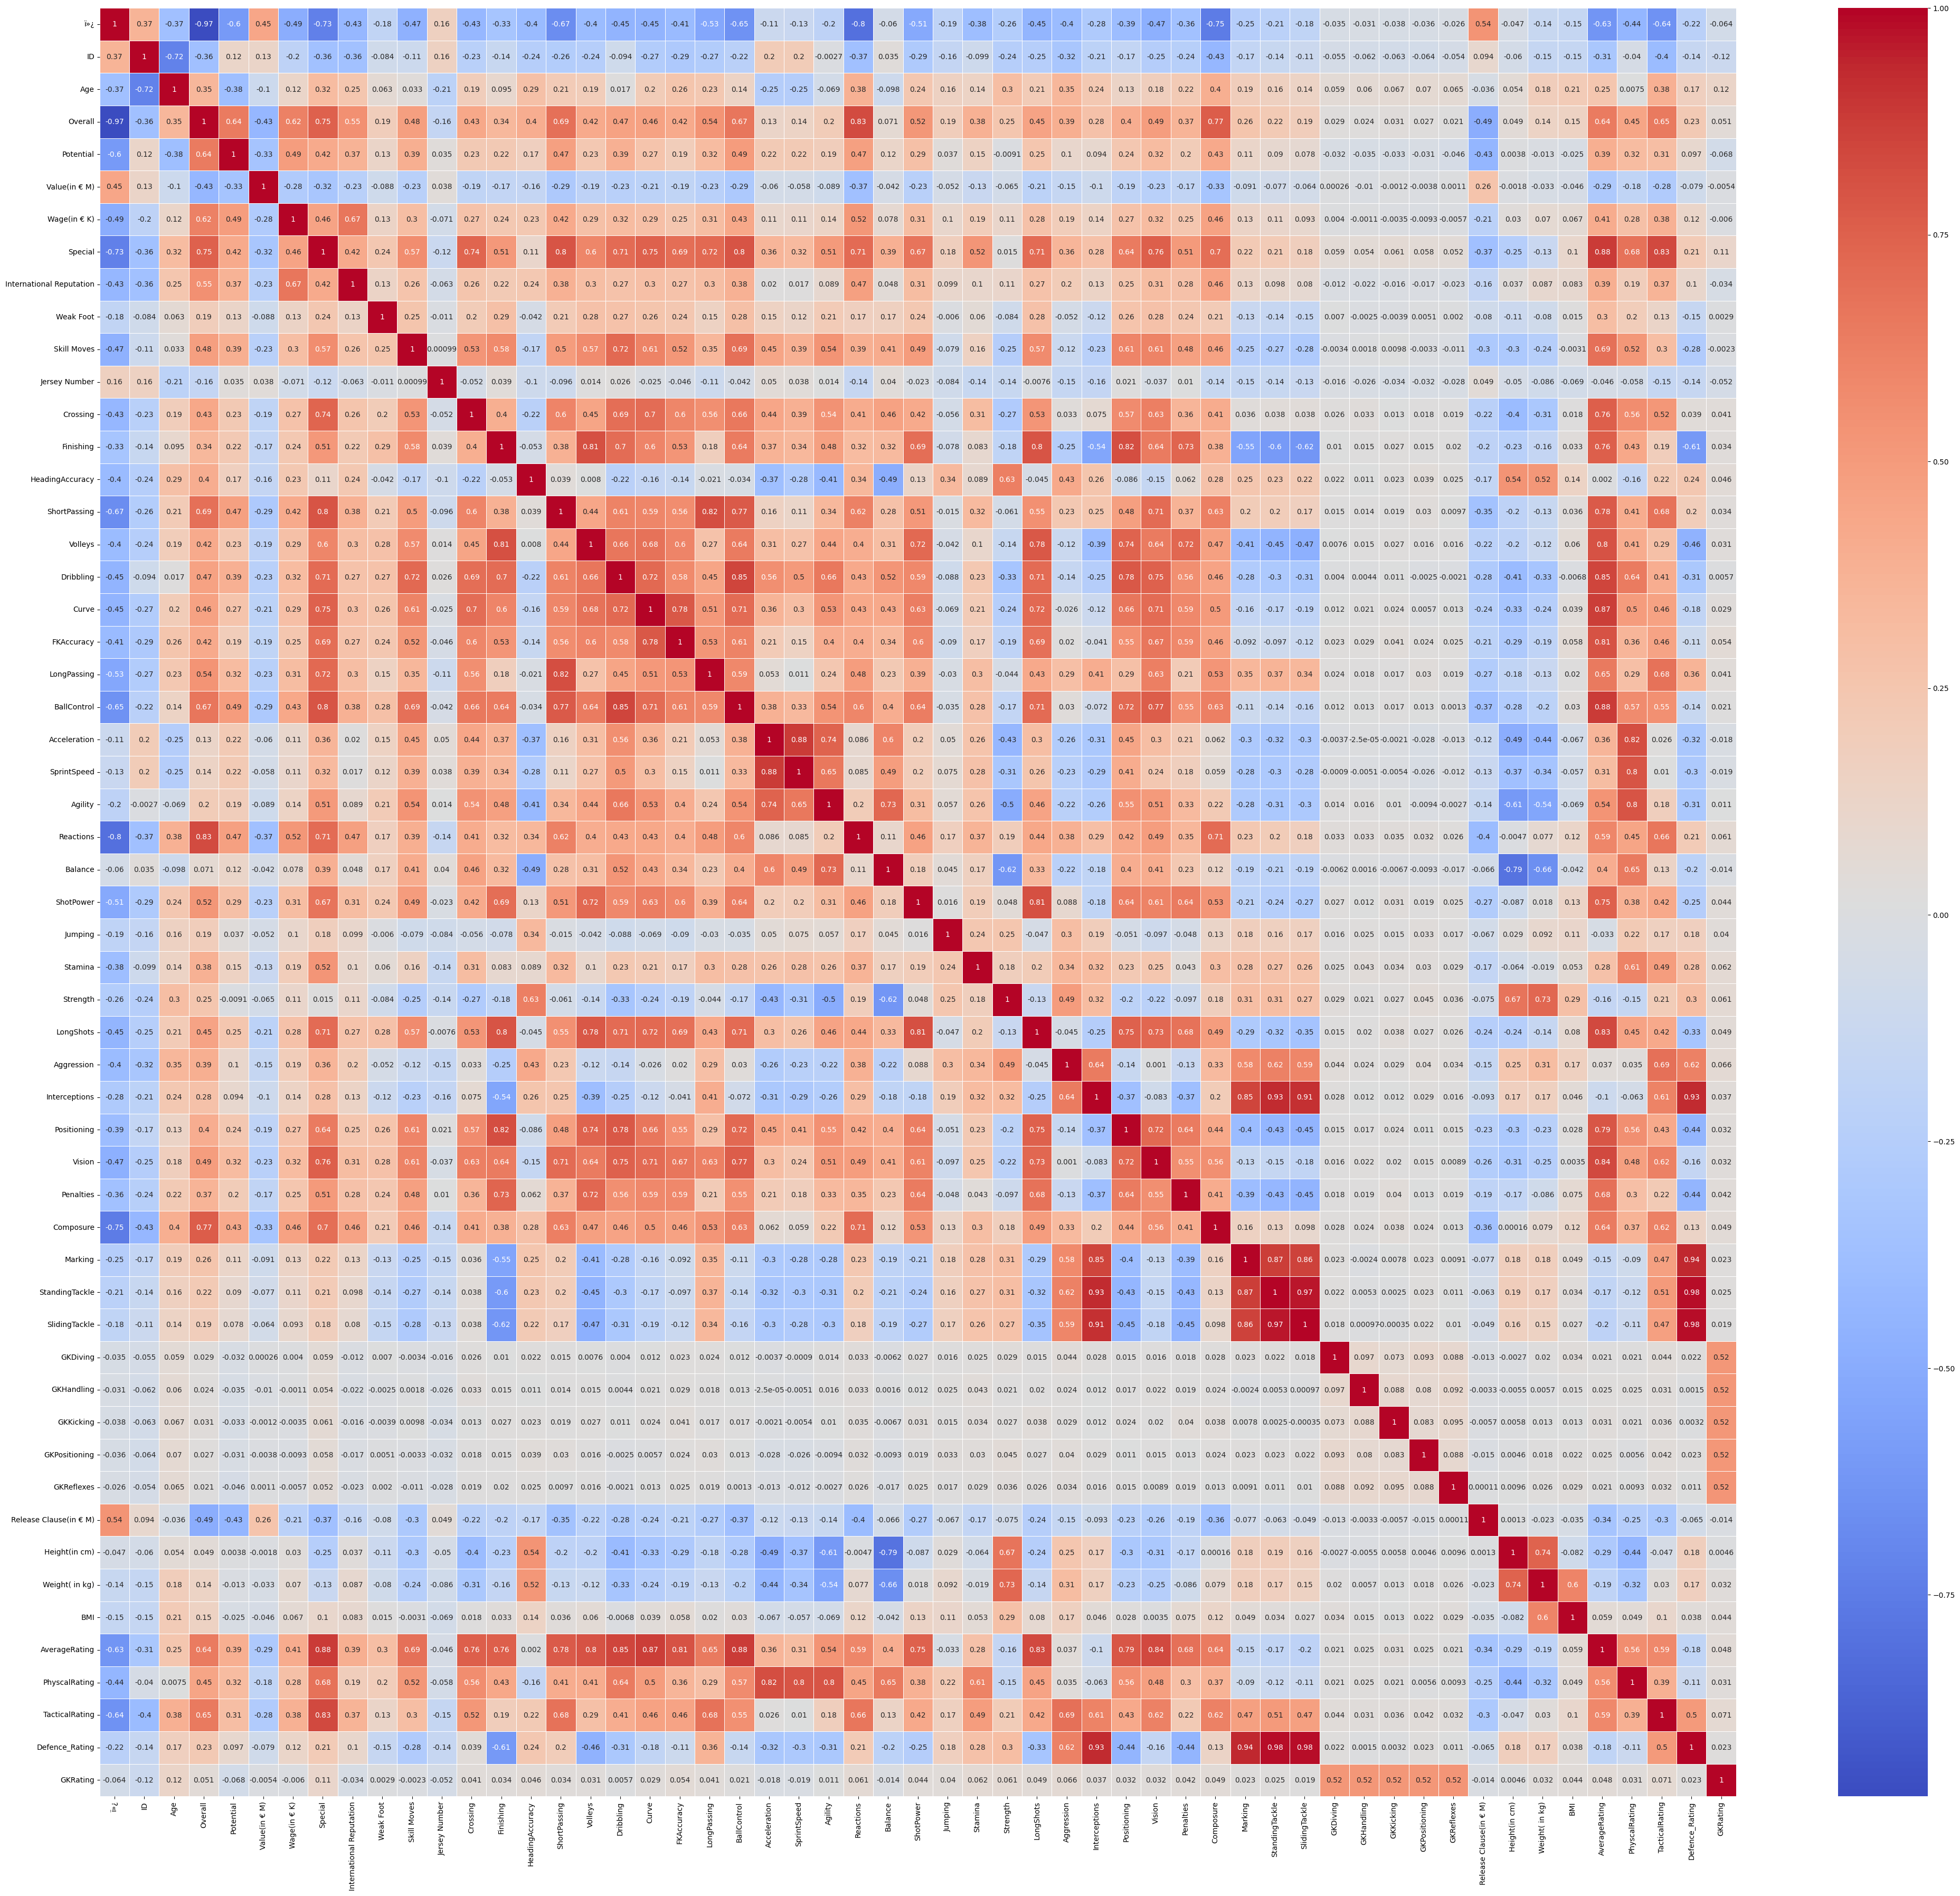

In [16]:
import seaborn as sns


numerical_columns = df.select_dtypes(include=['number'])


corr_matrix = numerical_columns.corr()

plt.figure(figsize=(50, 44))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.show()


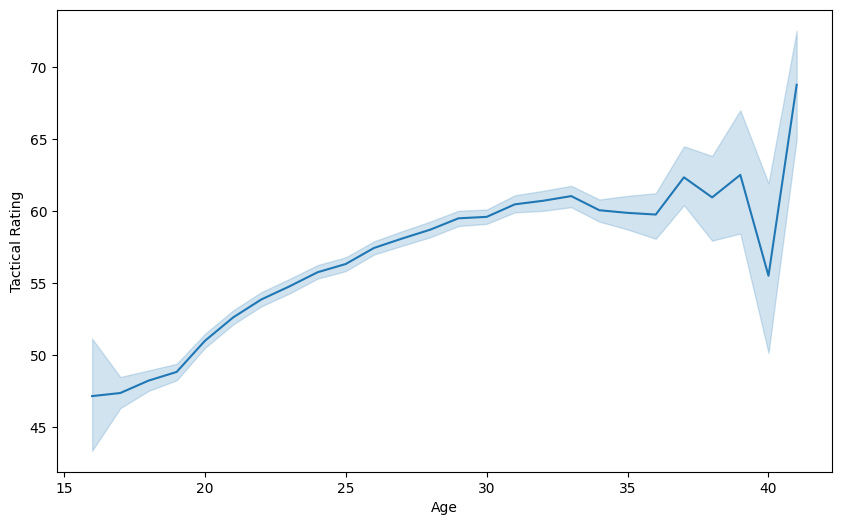

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='TacticalRating')
plt.xlabel("Age")
plt.ylabel("Tactical Rating")
plt.show()

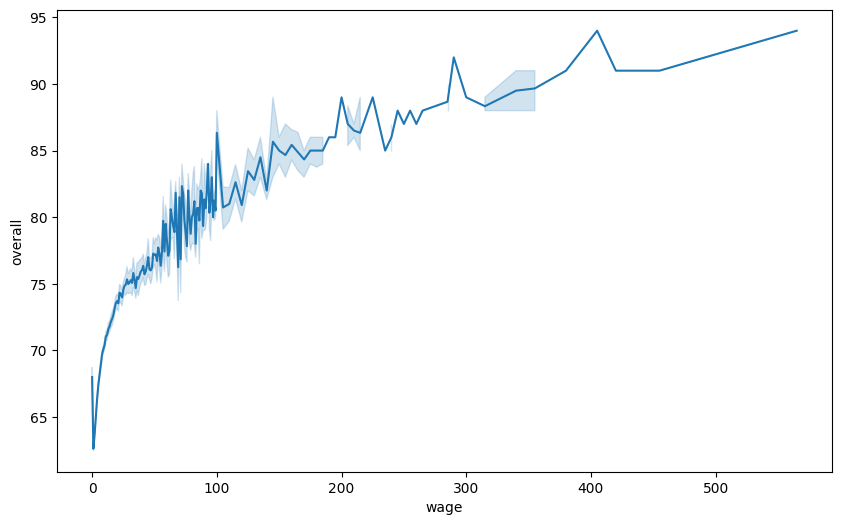

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Wage(in € K)', y='Overall')
plt.xlabel("wage")
plt.ylabel("overall")
plt.show()

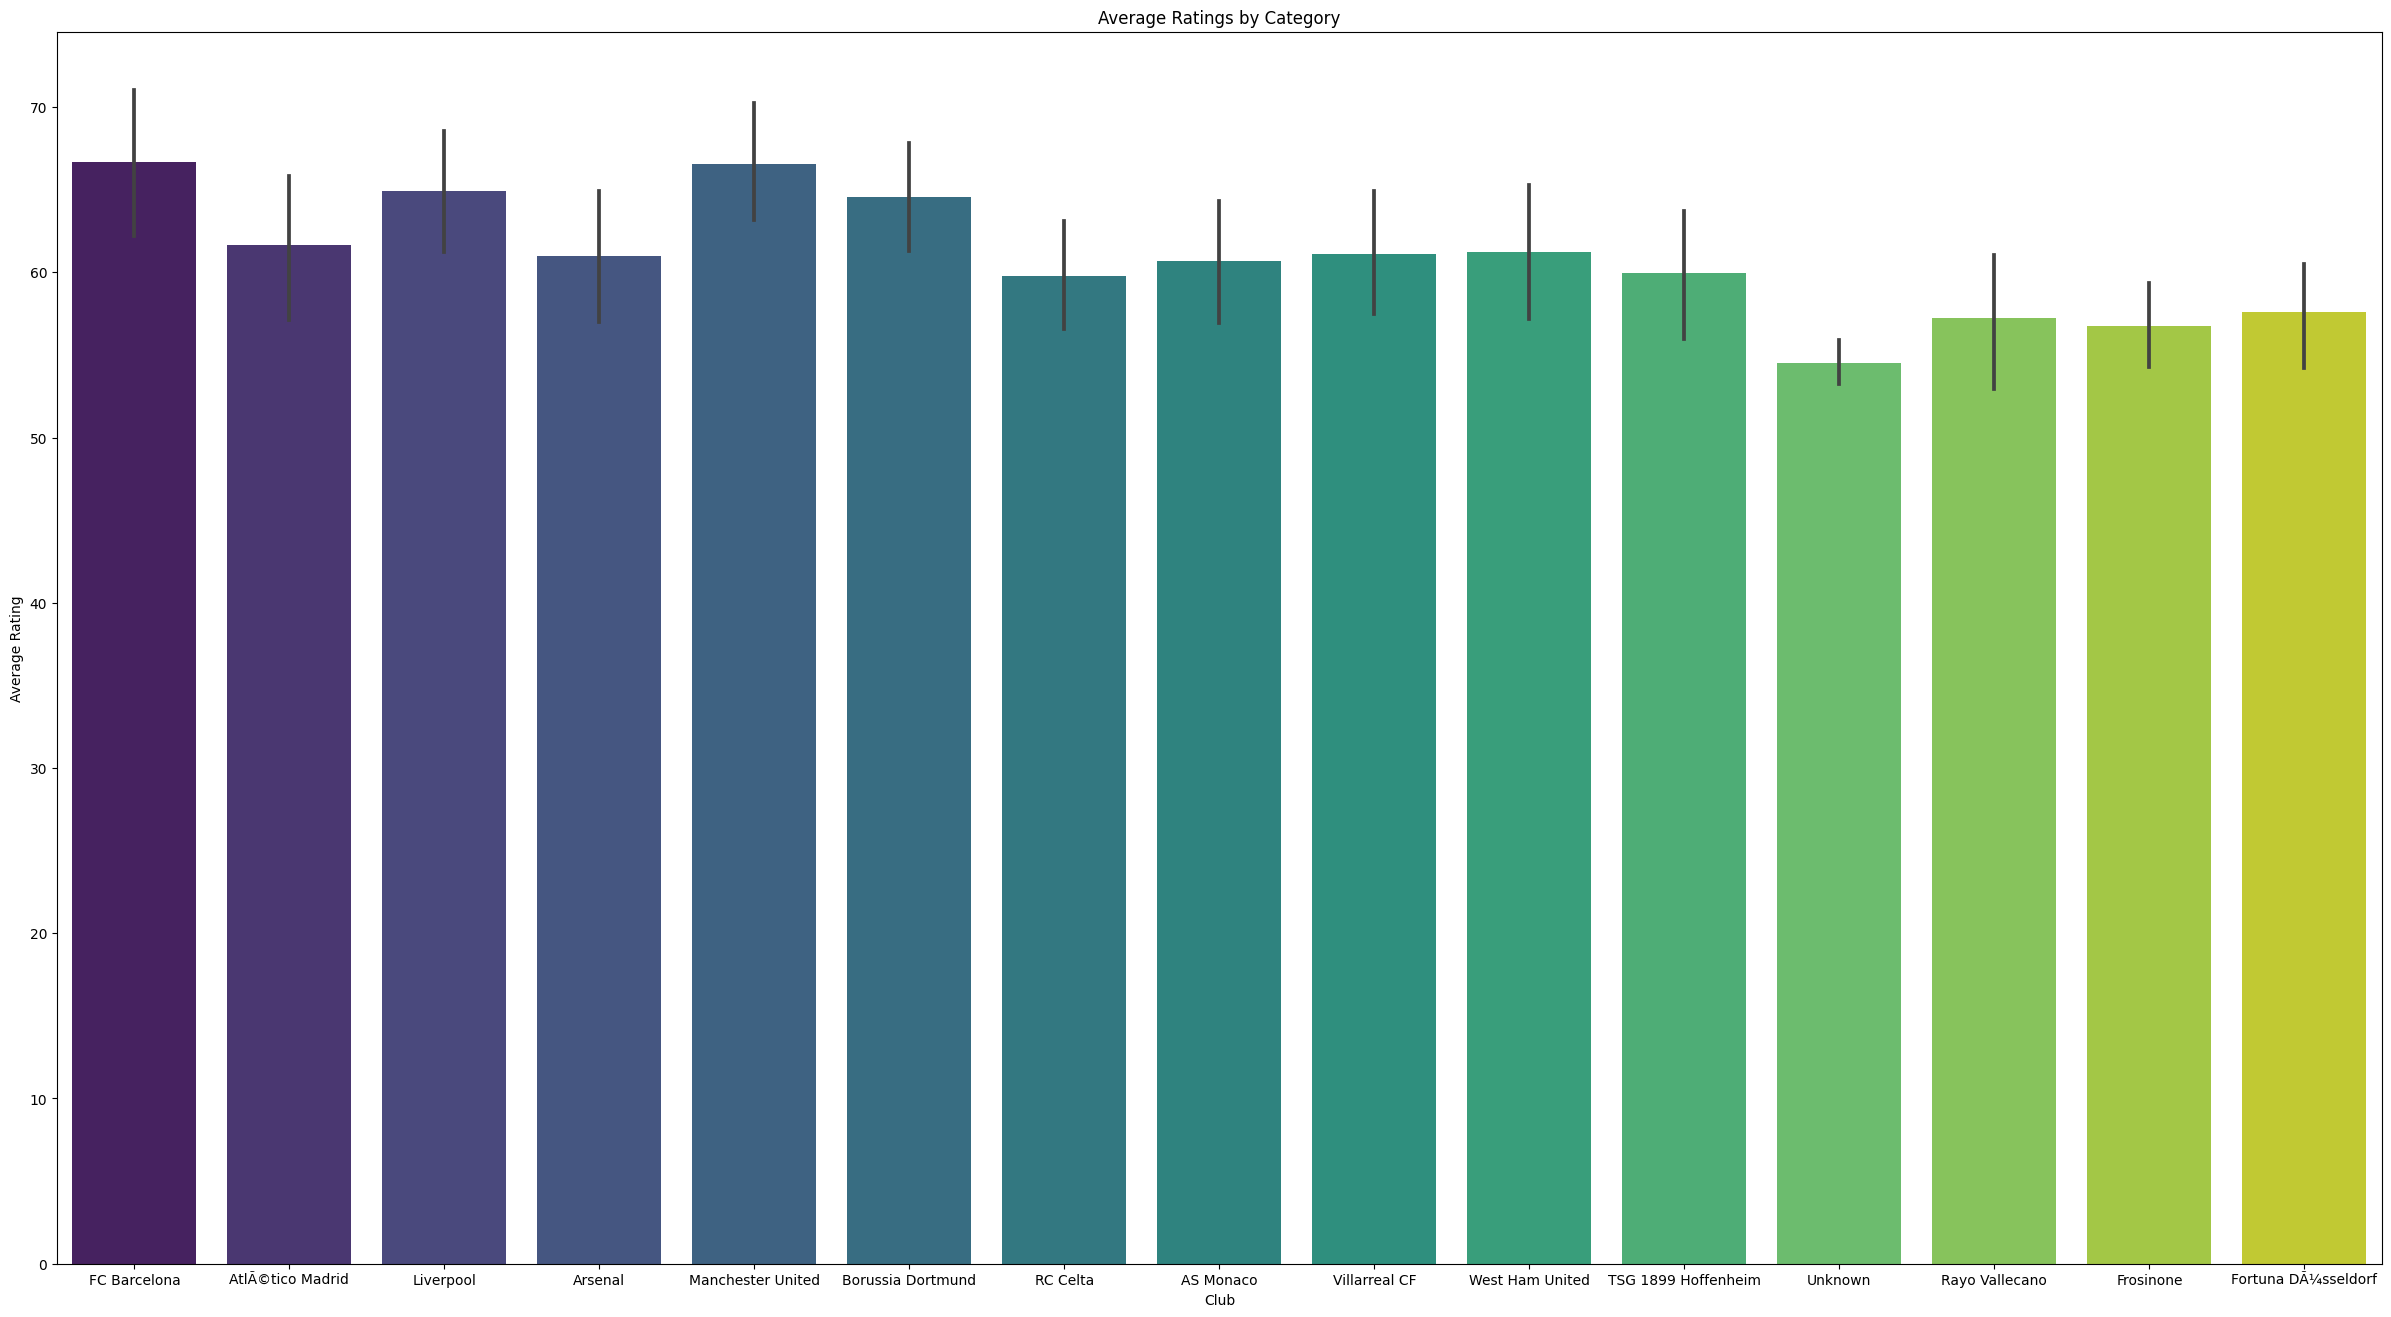

In [19]:
plt.figure(figsize=(30, 16))
top_club = df['Club'].value_counts().head(15).index
df_1 = df[df['Club'].isin(top_club)]
sns.barplot(data=df_1, x='Club', y='AverageRating', palette='viridis')
plt.title("Average Ratings by Category")
plt.xlabel("Club")
plt.ylabel("Average Rating")
plt.show()

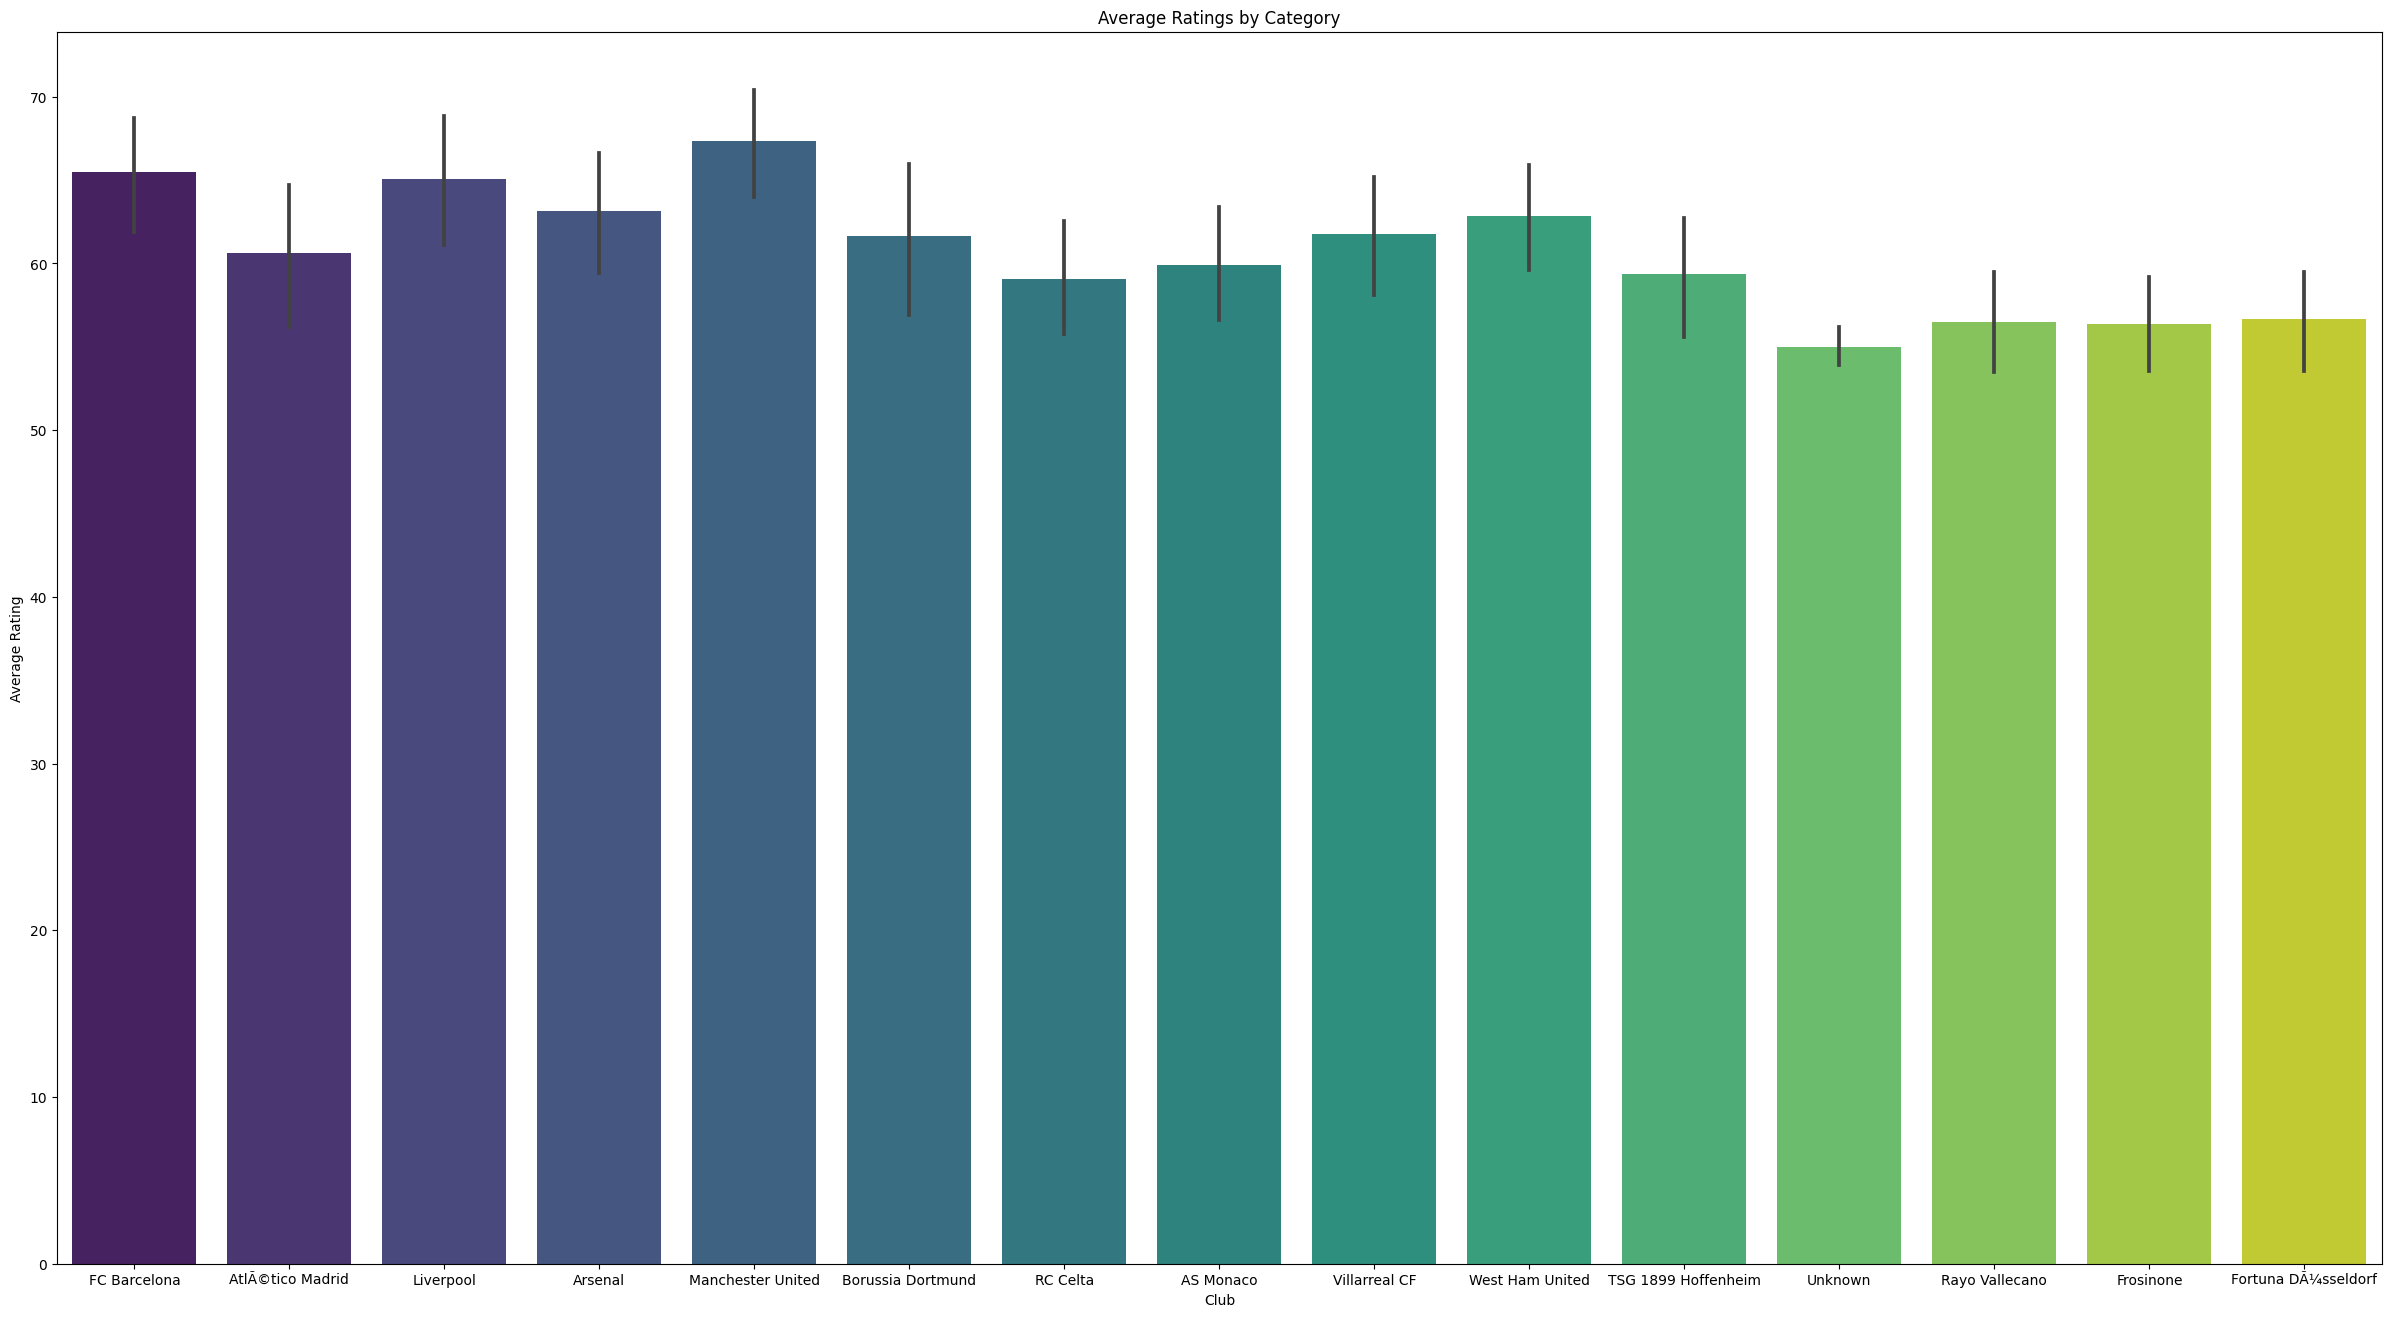

In [20]:
plt.figure(figsize=(30, 16))
top_club = df['Club'].value_counts().head(15).index
df_1 = df[df['Club'].isin(top_club)]
sns.barplot(data=df_1, x='Club', y='TacticalRating', palette='viridis')
plt.title("Average Ratings by Category")
plt.xlabel("Club")
plt.ylabel("Average Rating")
plt.show()

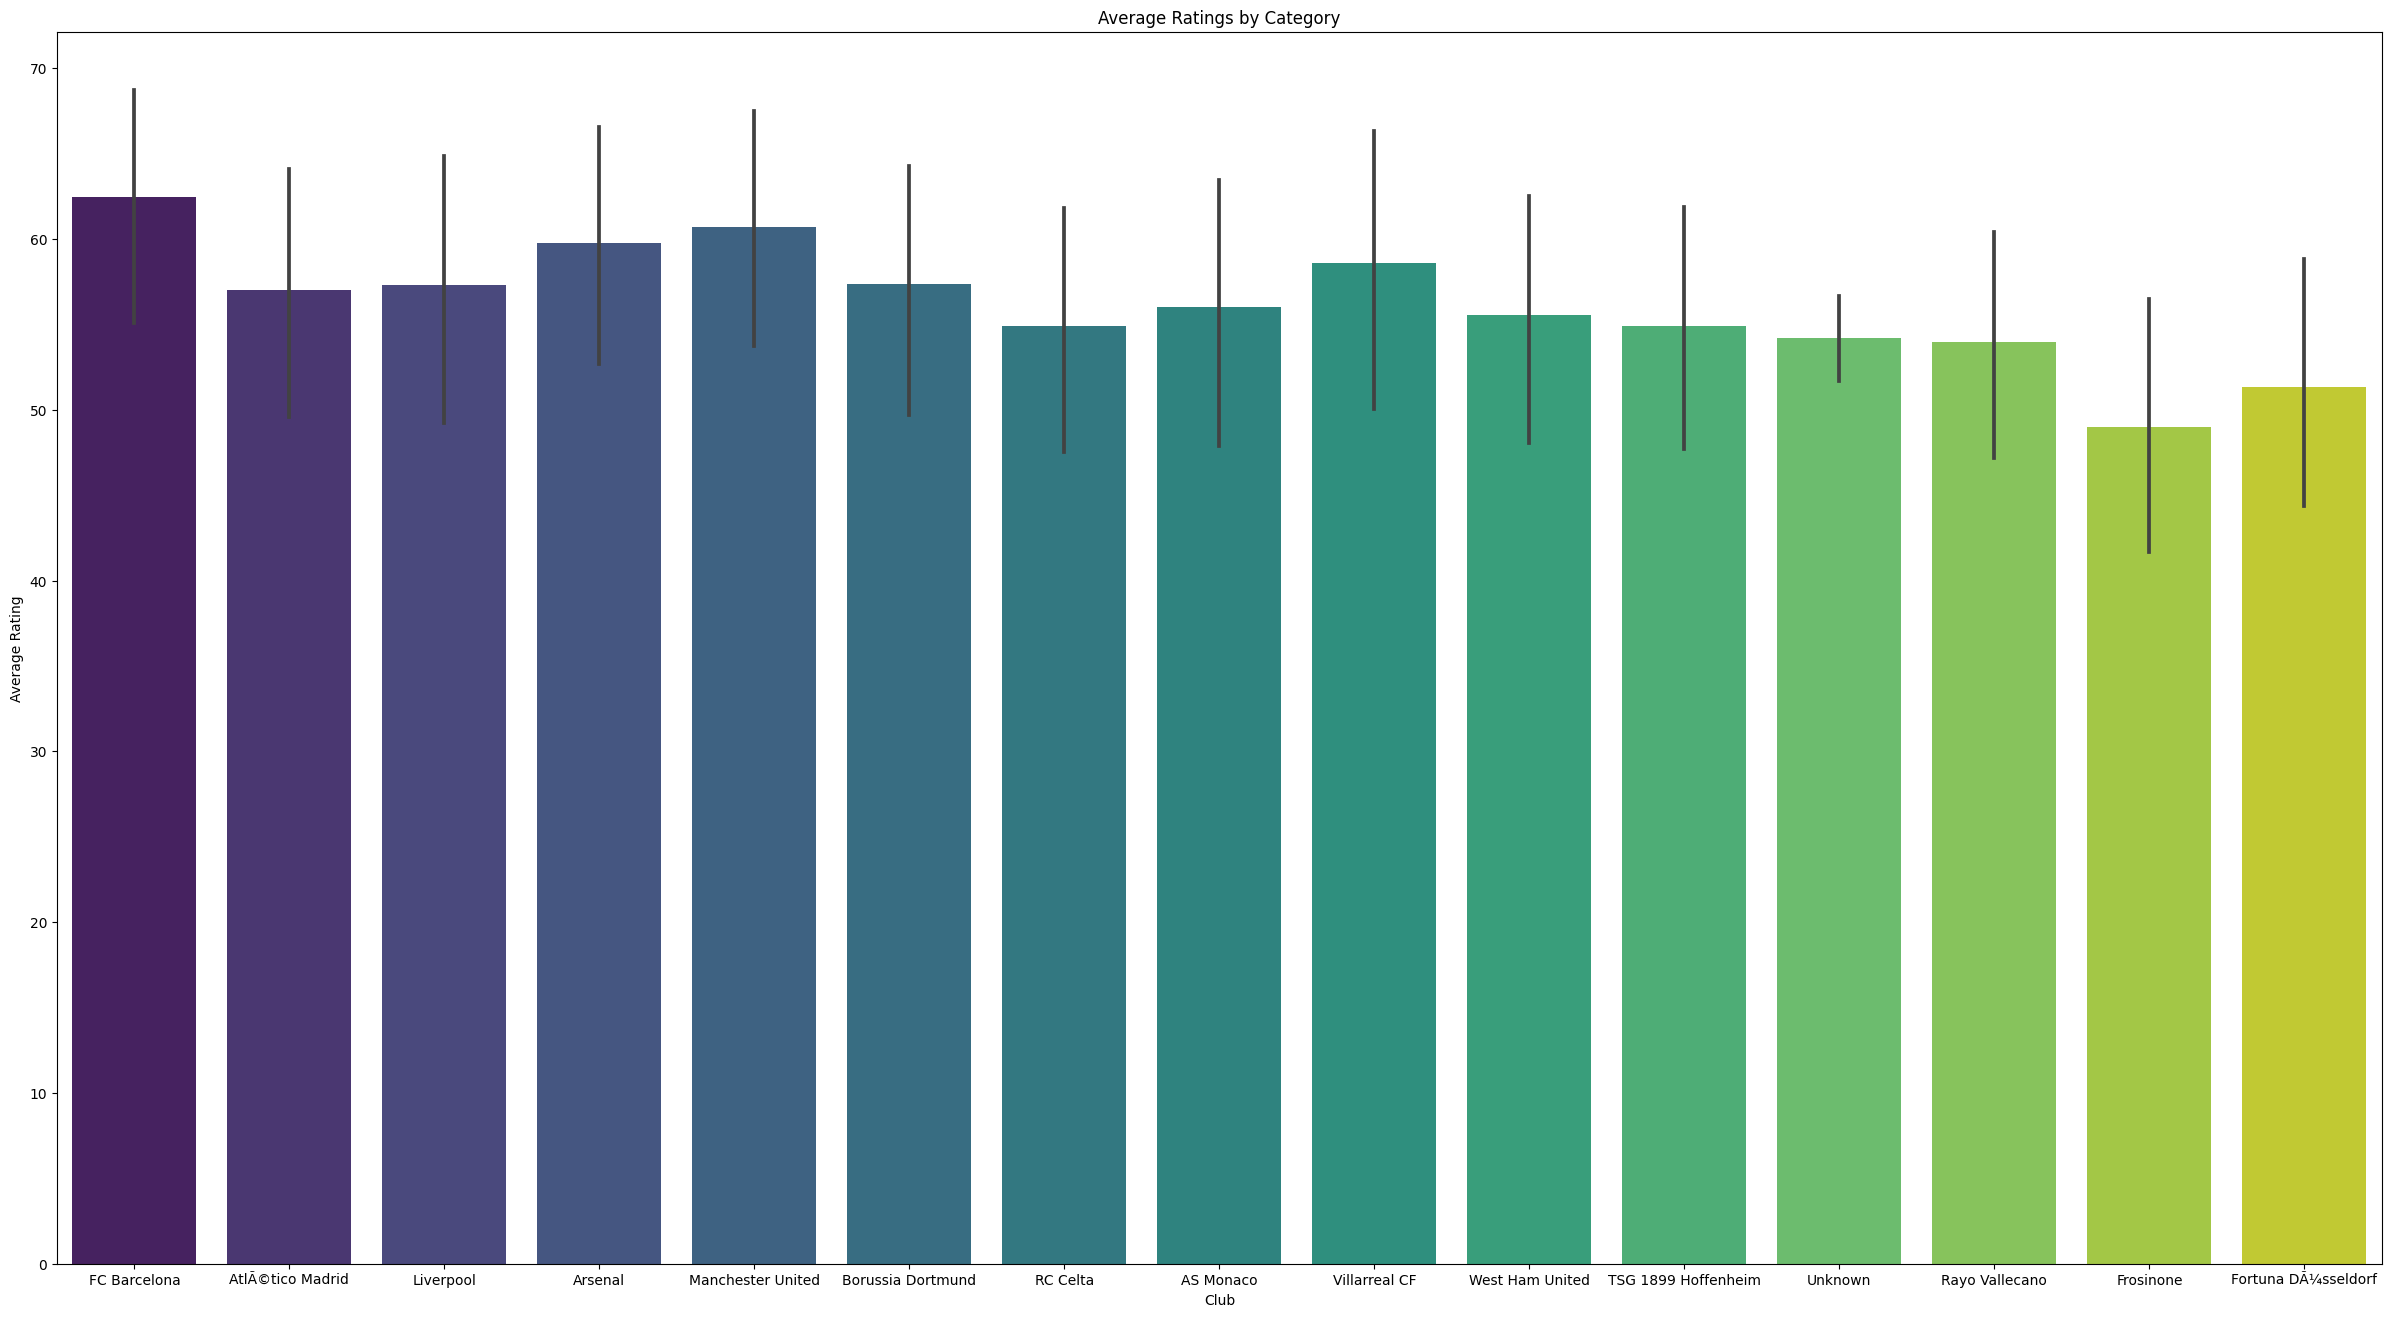

In [21]:
plt.figure(figsize=(30, 16))
top_club = df['Club'].value_counts().head(15).index
df_1 = df[df['Club'].isin(top_club)]
sns.barplot(data=df_1, x='Club', y='Defence_Rating', palette='viridis')
plt.title("Average Ratings by Category")
plt.xlabel("Club")
plt.ylabel("Average Rating")
plt.show()

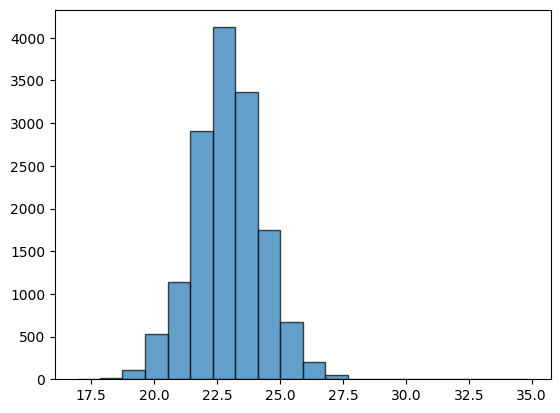

In [22]:
plt.hist(df['BMI'], bins=20, edgecolor='black', alpha=0.7)
plt.show()

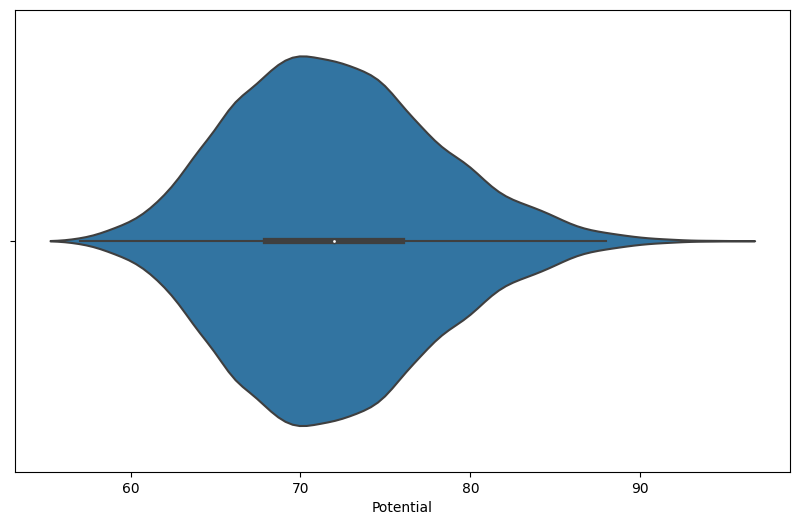

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Potential'])
plt.xlabel('Potential')
plt.show()

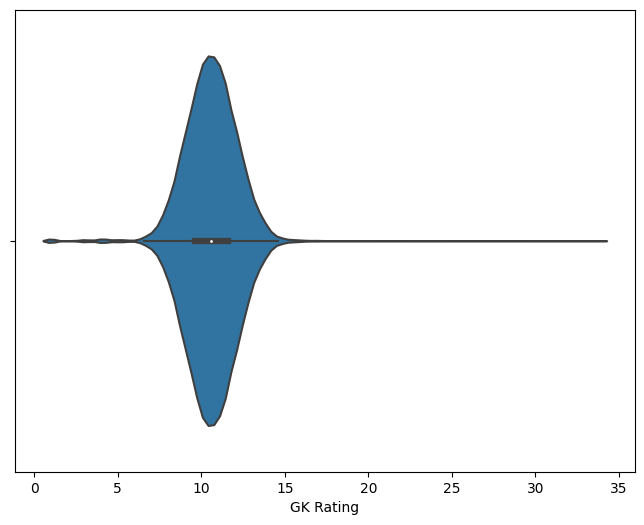

In [25]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['GKRating'])
plt.xlabel('GK Rating')
plt.show()

## **Q5**

first one is heat map corelation matrix of coloumns

line plot for age vs tactical awareness showing tactical ability increasing with increasing age

bar plots of average defence and tactical rating of players of 10 top clubs showing uniform distribution

BMI HISTOGRAPH: Majority of players fall in healthy BMI range 18.5 to 24.9

Nationality Count plot: England, Germany, Spain Argentina, France ,Brazil with majority









# **   Q1**

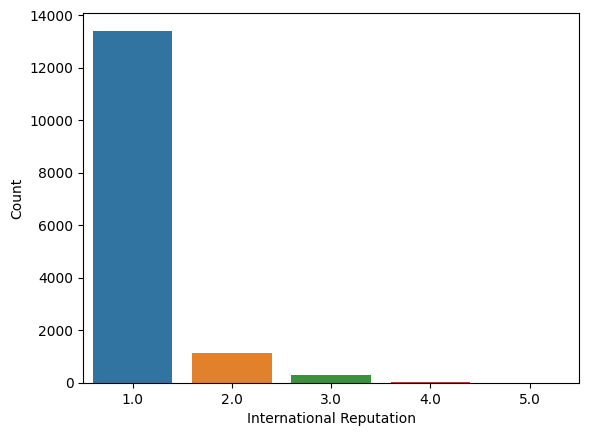

In [26]:
plt.figure()
sns.countplot(x='International Reputation', data=df)
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.show()

# **q2**

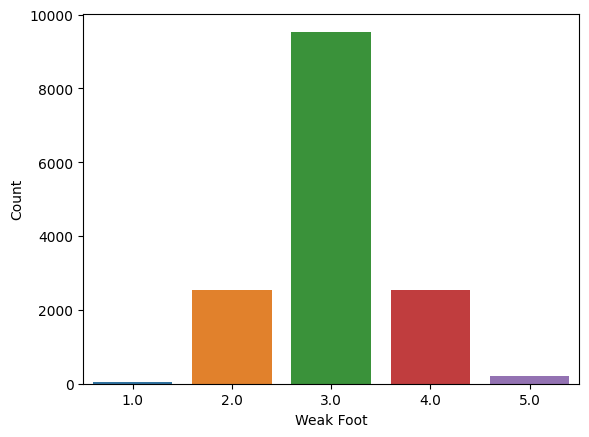

In [27]:
plt.figure()
sns.countplot(x='Weak Foot', data=df)
plt.xlabel('Weak Foot')
plt.ylabel('Count')
plt.show()

# **q8**

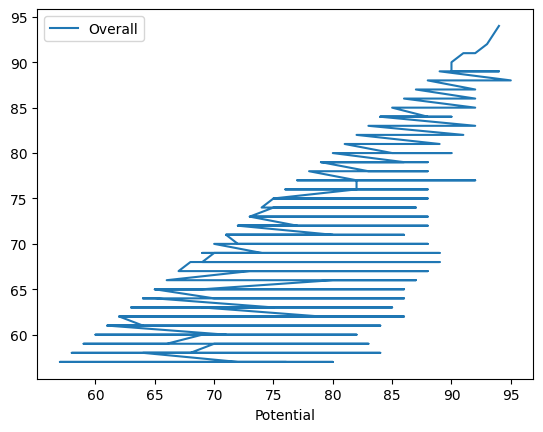

In [29]:
df.plot.line(x='Potential', y='Overall')
plt.show()

# **Q4**

# **Q12**

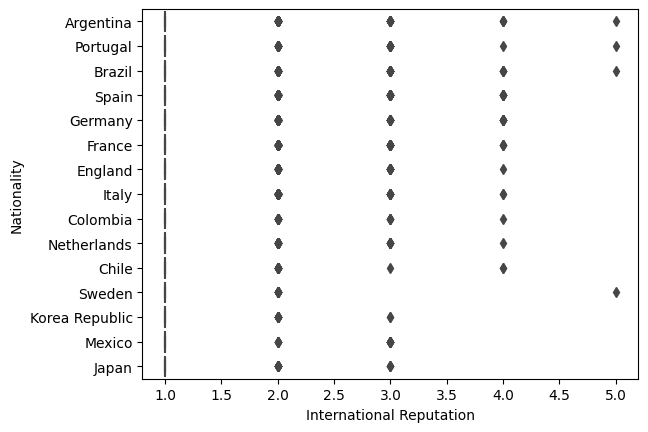

In [30]:
top_nationalities = df['Nationality'].value_counts().head(15).index
df_1 = df[df['Nationality'].isin(top_nationalities)]
plt.figure()
sns.boxplot(x='International Reputation', y='Nationality', data=df_1)
plt.xlabel('International Reputation')
plt.ylabel('Nationality')
plt.show()


# **q10**

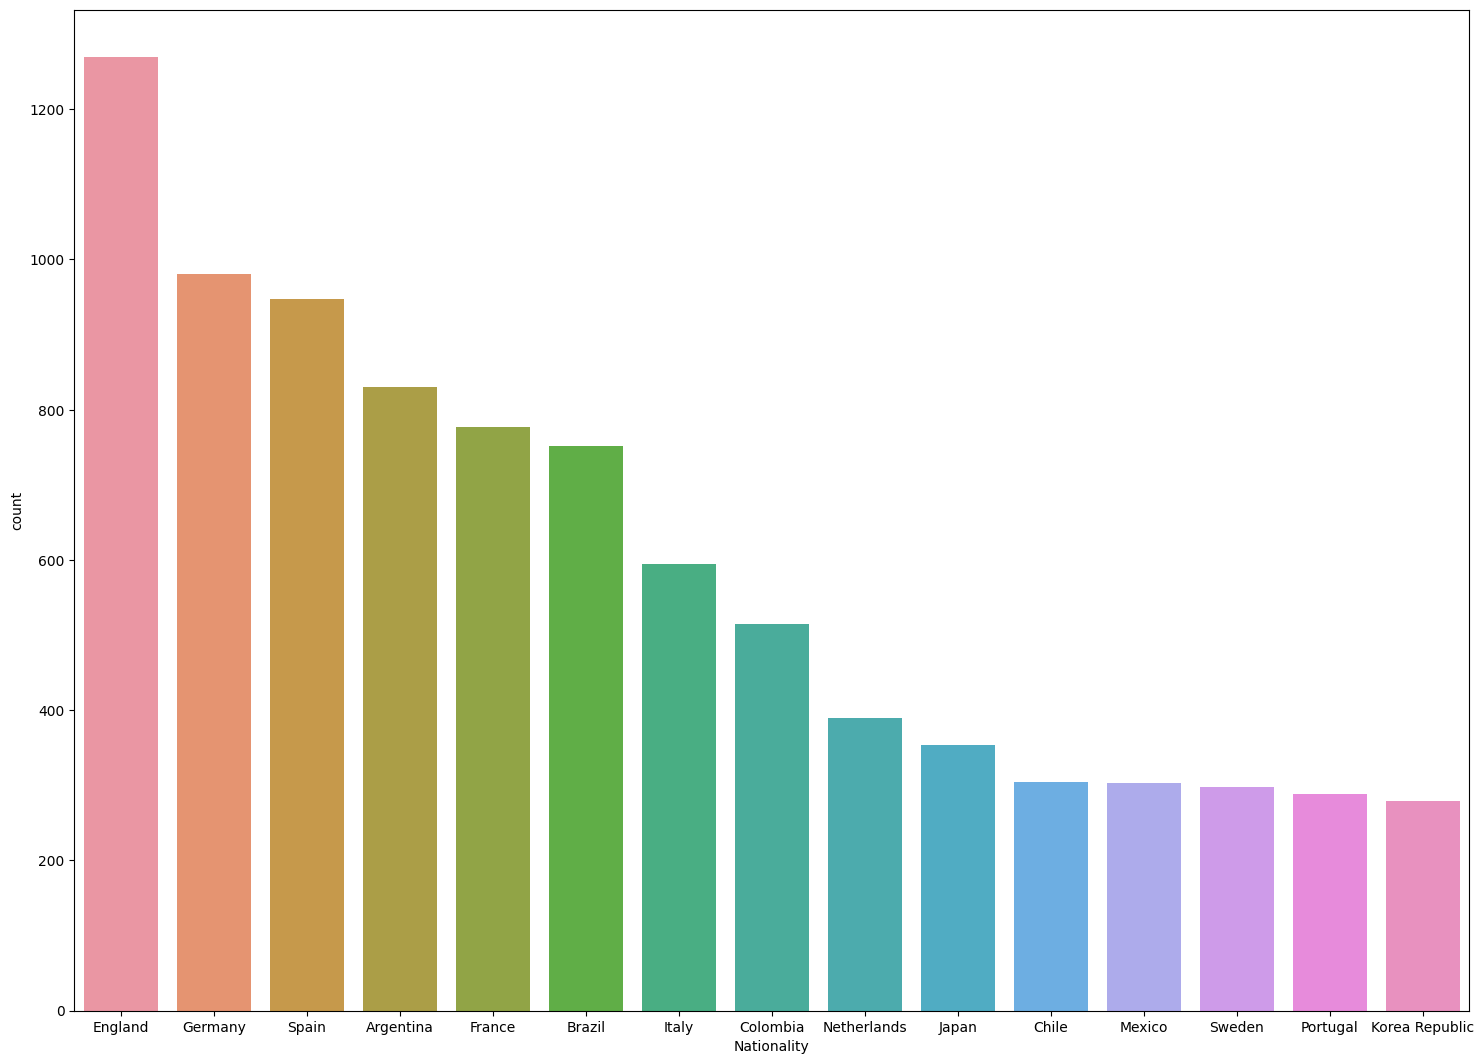

In [23]:
top_nationalities = df['Nationality'].value_counts().head(15).index
df_1 = df[df['Nationality'].isin(top_nationalities)]
plt.figure()
sns.countplot(x='Nationality', data=df_1, order=df_1['Nationality'].value_counts().index)
plt.show()

# **q11**

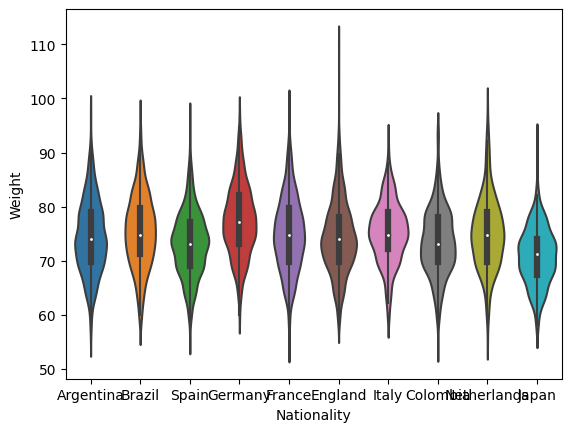

In [34]:
top_nationalities = df['Nationality'].value_counts().head(10).index
df_1 = df[df['Nationality'].isin(top_nationalities)]
plt.figure()
sns.violinplot(x='Nationality', y='Weight( in kg)', data=df_1)
plt.xlabel('Nationality')
plt.ylabel('Weight')
plt.show()

# **q9**

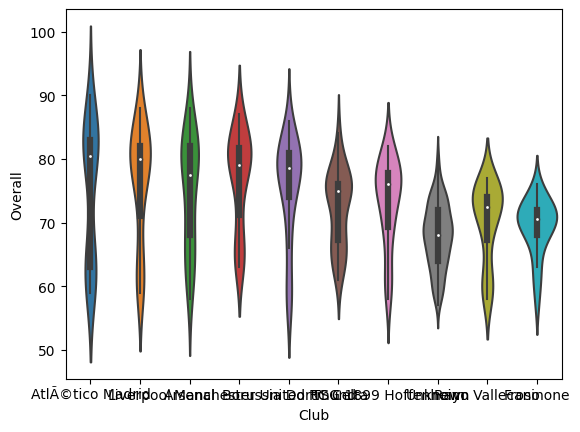

In [35]:
top_club = df['Club'].value_counts().head(10).index
df_1 = df[df['Club'].isin(top_club)]
plt.figure()
sns.violinplot(x='Club', y='Overall', data=df_1)
plt.xlabel('Club')
plt.ylabel('Overall')
plt.show()